In [5]:
import torch
from AmazonDataset import CustomDataset
from GiovanniDataset import GiovanniDataset
from pathlib import Path
import numpy as np
from openstl.api import BaseExperiment
from openstl.utils import create_parser, default_parser
from osgeo import gdal
import json
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pandas as pd
import geopandas as gpd
import GiovConfig as config
from prep_giov_data import prep4dataset
import matplotlib.pyplot as plt
from openstl.datasets.dataloader_moving_mnist import MovingMNIST, load_mnist

In [7]:
root = '/home/thiago/AmazonDeforestation_Prediction/OpenSTL/data'
mnist = load_mnist(root, data_name='mnist')

In [8]:
print(mnist.shape)

(60000, 28, 28)


0 255 0 255 0 255 0 255


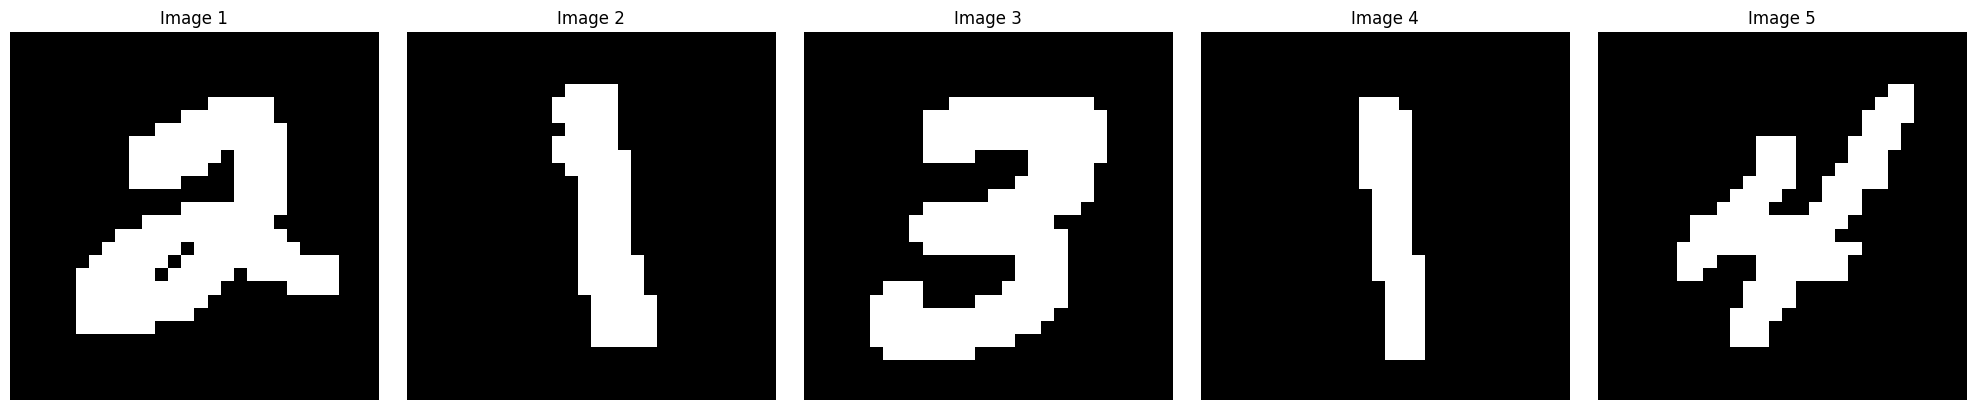

In [16]:
# # Generate sample data for five images (each with one channel)
mnist2 = mnist.copy()
mnist2[mnist2 > 0] = 255
idx_b = 5
image1 = mnist2[idx_b]  # Replace this with your actual image data
image2 = mnist2[idx_b + 1]
image3 = mnist2[idx_b + 2]
image4 = mnist2[idx_b + 3]
image5 = mnist2[idx_b + 4]
print(image1.min(), image1.max(), image2.min(), image2.max(), image3.min(), image3.max(), image4.min(), image4.max())
# Create a figure with five subplots in one row
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the figure size as needed

# Plot each image in a separate subplot
axes[0].imshow(image1, cmap='gray')
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(image2, cmap='gray')
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap='gray')
axes[2].set_title('Image 3')
axes[2].axis('off')

axes[3].imshow(image4, cmap='gray')
axes[3].set_title('Image 4')
axes[3].axis('off')

axes[4].imshow(image5, cmap='gray')
axes[4].set_title('Image 5')
axes[4].axis('off')

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

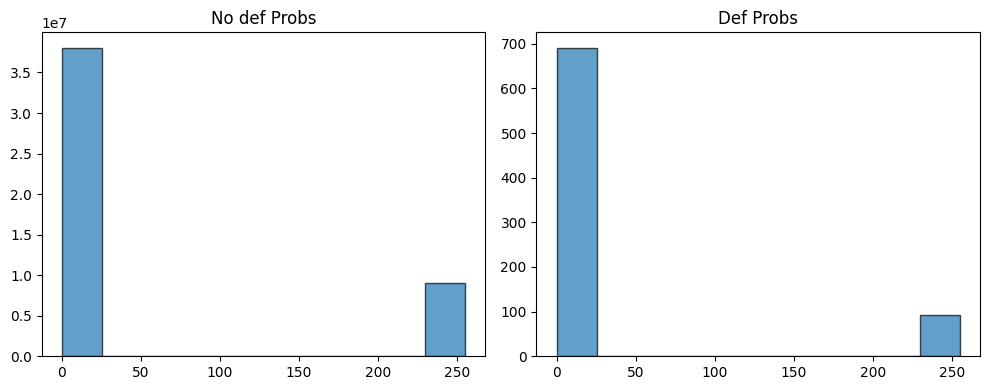

In [20]:
# Plot the histograms side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(mnist2.reshape(-1), bins=10, range=(0, 255), edgecolor='black', alpha=0.7)
plt.title('No def Probs')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image2.reshape(-1), bins=10, range=(0, 255), edgecolor='black', alpha=0.7)
plt.title('Def Probs')
# plt.xlabel('Value')
# plt.ylabel('Frequency')

plt.tight_layout()
# Save the figure with 300 DPI
# plt.savefig(exp_path / 'saved' / 'classes_probs_hist.jpeg', dpi=300)
# plt.show()

In [23]:
mnist_0 = np.sum(mnist2 == 0)
mnist_1 = np.sum(mnist2 == 255)
print(mnist_0, mnist_1)
print(mnist_0 / (mnist_0 + mnist_1), mnist_1 / (mnist_0 + mnist_1))

38045844 8994156
0.8087977040816327 0.19120229591836735
